In [1]:
import glob
import re
import gc

from collections import namedtuple

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.display import clear_output

In [2]:
label_map = {0: 'No mask', 1: 'Right mask', 2: 'Wrong mask'}
color_map = {0: 'red', 1: 'green', 2:'orange'}

In [3]:
IMG_PATH = './dataset/images/'

In [4]:
all_img_path = glob.glob(IMG_PATH + '**/*.jpg',recursive=True)

In [5]:
img_paths = [glob.glob(IMG_PATH + '**/{}.jpg'.format(i), recursive=True)[0]
            for i in range(1,len(all_img_path)+1)]
lbl_paths = [img_path.replace('images','labels').replace('jpg','txt') for img_path in img_paths]

In [6]:
parts = list(range(0,len(img_paths)+1,266))
Member = namedtuple('Member', ['start_part','img_paths','lbl_paths'])

In [7]:
Nhan = Member(start_part=parts[0], img_paths=img_paths[parts[0]:parts[1]], lbl_paths=lbl_paths[parts[0]:parts[1]])
Nhi = Member(start_part=parts[1], img_paths=img_paths[parts[1]:parts[2]], lbl_paths=lbl_paths[parts[1]:parts[2]])
Quyen = Member(start_part=parts[2], img_paths=img_paths[parts[2]:parts[3]], lbl_paths=lbl_paths[parts[2]:parts[3]])
Quynh = Member(start_part=parts[3], img_paths=img_paths[parts[3]:parts[4]], lbl_paths=lbl_paths[parts[3]:parts[4]])

In [8]:
imgs = []
contents = []
me = Nhan # Đỏi tên
for img_path, lbl_path in zip(me.img_paths, me.lbl_paths):
    imgs.append(cv2.imread(img_path))
    with open(lbl_path) as f:
        content = f.read().strip().split('\n')
    content = [element.strip().split(' ') for element in content]
    contents.append(content)

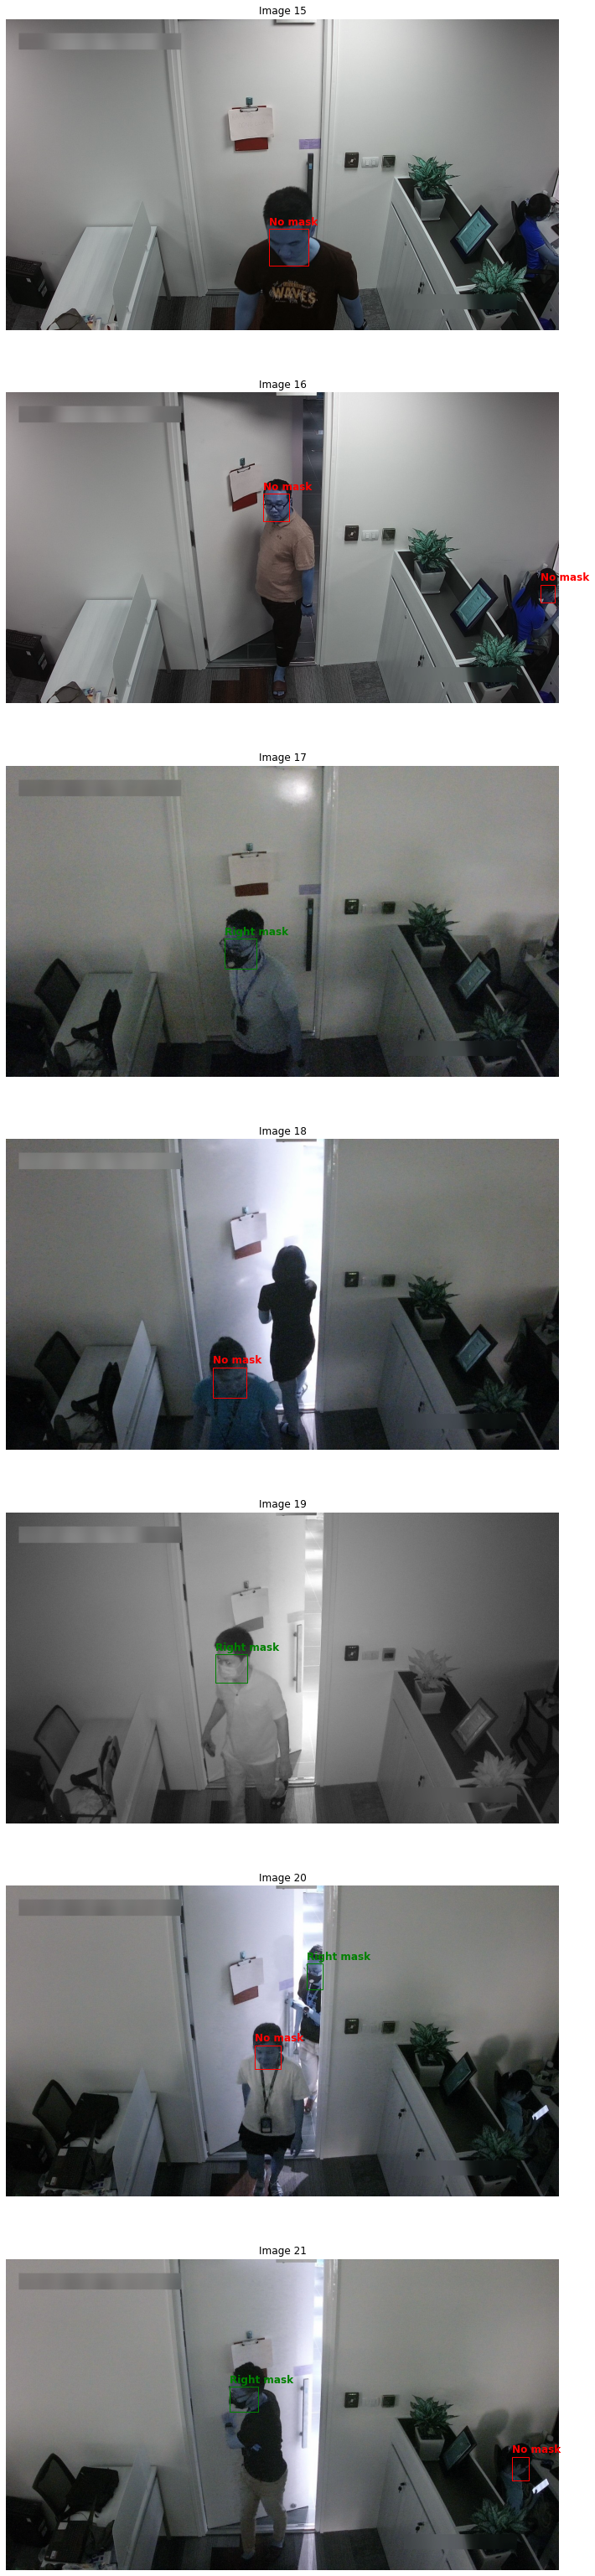

Tiếp tục: 0
Note!!! - last_num_of_batch: 20
Dừng ở ảnh 21


In [9]:
last_num_of_batch = 6 #Dừng ở đâu thì thay giá trị vào đây, default: 6
for batch in range(last_num_of_batch,len(imgs)+1,7):
    start = batch - 6
    fig, axs = plt.subplots(7,1,figsize=(15,56))
    for idx, (img, content) in enumerate(zip(imgs[start:batch+1], contents[start:batch+1])):
        img = np.array(img)
        axs[idx].imshow(img)
        if content != [['']]:
            img_shape = img.shape[1::-1]
            content = np.array(content, dtype=float)
            content[:,1:] = np.round(content[:,1:] * (img_shape * 2))
            content = content.astype(int)
            for label, box in zip(content[:,0], content[:,1:]):
                x,y,w,h = *(box[:2] - box[2:] / 2), *box[2:]
                rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor=color_map[label], facecolor='none')
                axs[idx].add_patch(rect)
                axs[idx].text(x, y - 10, label_map[label], color=color_map[label], fontsize=12, fontweight='bold')
                axs[idx].axis('off')
        axs[idx].set_title('Image %d' % (me.start_part + start + idx + 1))
    plt.show()
    cont = input('Tiếp tục: ')
    if cont != '':
        break
    clear_output()
    gc.collect()
if batch != 265:
    print('Note!!! - last_num_of_batch: %d' % (batch)) # Note lại cái này để bắt đầu tiếp
    print('Dừng ở ảnh %d' % (me.start_part + batch + 1))